In [1]:
import illustris_python as il
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import SymLogNorm
import h5py
from tqdm import tqdm


In [2]:
basePath = 'sims.TNG/TNG100-1/output'
snap     = 99
halo_ID  = 172650

In [3]:
!ls

examples	  moreColors.png		  sims.other
illustris_idl	  progenitorID_subhalo172650.txt  sims.TNG
illustris_julia   progenitorID_subhalo239993.txt  SubhaloID_stars.txt
illustris_matlab  README.txt
illustris_python  sims.illustris


In [8]:
fields = ['Coordinates','ParticleIDs']
stars  = il.snapshot.loadSubhalo(basePath,snap, halo_ID, 'stars', fields=fields)
starsID = stars['ParticleIDs']

fields= ['SubfindID','SnapNum','DescendantID','SubhaloID', 'Mass']
tree   = il.sublink.loadTree(basePath, snap, halo_ID, fields=fields )
tree_main = il.sublink.loadTree(basePath, snap, halo_ID, fields=fields, onlyMPB=True)

In [8]:
ID_init = tree['SubhaloID'][0]
subhalo_ID   = tree['SubhaloID'] - ID_init
subhalo_snap = tree['SnapNum']
MPB_count = tree_main['count']
DescendantID_noMB = tree['DescendantID'] - ID_init

In [113]:
arg_Descendant_of_MB = np.where(DescendantID_noMB < (MPB_count-1))[0][MPB_count:]

In [10]:
numsnap = np.arange(0,99 + 1,1)

subhalosID = tree['SubfindID']
Descendant_subhalos = subhalosID[arg_Descendant_of_MB]

subhalosSnap  = tree['SnapNum']
Descendant_snap = subhalosSnap[arg_Descendant_of_MB]


In [3]:
ProgenitorID = np.loadtxt(f'progenitorID_subhalo{halo_ID}.txt')#, progenitorID, fmt='%d')

In [12]:
np.isin(ProgenitorID,tree['SubfindID']).sum()

317881

array([ 172650,  173164,  174699, ...,  175419, 2780422,  173229],
      dtype=int32)

In [11]:
progenitorID = np.zeros(stars['count'], dtype=int) - 1

# Iterate on the snapshots
for s in tqdm(numsnap, leave=True):

    # Iterate on the subhalos in that snapshot ONLY
    idx_subhalos  = np.where(Descendant_snap == s)[0]
    keep_subhalos = Descendant_subhalos[idx_subhalos]

    for index, i in enumerate(keep_subhalos):

        # Load ID of stars in the subhalo
        subhalos_starsID = il.snapshot.loadSubhalo(basePath, s, i, 'stars', fields=['ParticleIDs'])

        not_already_IDed = np.where(progenitorID == -1)[0]
        stars_in = np.isin(starsID[not_already_IDed], subhalos_starsID)

        indices = not_already_IDed[stars_in]
        progenitorID[indices] = tree['SubhaloID'][arg_Descendant_of_MB][idx_subhalos][index] - ID_init

    # For main branch
    idx_subhalos  = np.where(tree_main['SnapNum'] == s)[0]
    keep_subhalos = tree_main['SubfindID'][idx_subhalos]

    for jndex, j in enumerate(keep_subhalos):

        # Load ID of stars in the subhalo
        subhalos_starsID = il.snapshot.loadSubhalo(basePath, s, j, 'stars', fields=['ParticleIDs'])

        not_already_IDed = np.where(progenitorID == -1)[0]
        stars_in = np.isin(starsID[not_already_IDed], subhalos_starsID)

        indices = not_already_IDed[stars_in]
        progenitorID[indices] = tree_main['SubhaloID'][idx_subhalos][jndex] - ID_init



100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


In [25]:
b = il.groupcat.loadSubhalos(basePath,0,fields=['SubhaloPos', 'SubhaloMass'])

In [28]:
b['SubhaloMass']

array([0.09489804, 0.09346825, 0.07608771, 0.0716163 , 0.07000763,
       0.0514081 , 0.01006774, 0.06440441, 0.06015995, 0.05387095,
       0.05333722, 0.03870133, 0.00853457, 0.04824564, 0.04563871,
       0.04463162, 0.04774205, 0.04340912, 0.04510667, 0.04277872,
       0.04086558, 0.03999575, 0.041764  , 0.03828712, 0.04044167,
       0.03553401, 0.03719009, 0.03653081, 0.03651568, 0.03521369,
       0.03578344, 0.0349674 , 0.03465927, 0.03323574, 0.03251218,
       0.03152735, 0.03043768, 0.02637541, 0.03311098, 0.03062136,
       0.02996153, 0.02939756, 0.03108671, 0.02815523, 0.02887789,
       0.02847205, 0.02819161, 0.02828008, 0.02644197, 0.02686028,
       0.02716658, 0.0263418 , 0.02536363, 0.02576736, 0.02437491,
       0.02572273, 0.02688583, 0.02664293, 0.02435648, 0.02602508,
       0.02446307, 0.02509211, 0.02334187, 0.02438163, 0.02508508,
       0.02309543, 0.02413365, 0.02415223, 0.0225508 , 0.02374796,
       0.02427926, 0.02424707, 0.02390969, 0.02435507, 0.02361

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

unique, count = np.unique(progenitorID, return_counts=True)

sorted_count   = np.argsort(-count)
sorted_unique  = unique[sorted_count]

dim1 = 0
dim2 = 1
dim3 = 2

x_min, x_max = 10000, 14000
y_min, y_max = 37000, 38500
z_min, z_max = 61000, 64000

x_limits = (x_min, x_max)
y_limits = (y_min, y_max)
z_limits = (z_min, z_max)

# Set up the figure and axis
fig, ax = plt.subplots()

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# fig.suptitle('Horizontally stacked subplots')

num_frames = 99

# def generate_data(frame_number):

#     i = np.linspace(99,0,100)[frame_number]
#     arg_use = np.where(progenitorID == i)[0]
#     X_use = stars['Coordinates'][:,0][arg_use]
#     Y_use = stars['Coordinates'][:,1][arg_use]
#     # plt.scatter(X_use, Y_use)
#     # plt.show()

#     return np.array([X_use,Y_use])

def generate_data(frame_number):

    i = np.linspace(0,99,100)[::-1][frame_number]

    arg_use = np.where(progenitorID == i)[0] # Only birth
    # arg_use = np.where(progenitorID == i)[0] # all that are born

    ParticleIDs_use = stars['ParticleIDs'][arg_use]
    
    snap = tree_main['SnapNum'][::-1][frame_number]
    subfind = tree_main['SubfindID'][::-1][frame_number]
    stars_coord  = il.snapshot.loadSubhalo(basePath,snap, subfind, 'stars', fields=['Coordinates', 'ParticleIDs'])

    if stars_coord['count'] == 0:
        return np.array([[],[]]), np.array([[],[]]), np.array([])
    
    here_stars_ParticleIDs = stars_coord['ParticleIDs']
    mask_use = np.isin(here_stars_ParticleIDs, ParticleIDs_use)

    X_use = stars_coord['Coordinates'][mask_use,dim1]
    Y_use = stars_coord['Coordinates'][mask_use,dim2]

    if len(X_use) == 0:
        return np.array([[],[]]), np.array([[],[]]), np.array([])

    subhalos = il.groupcat.loadSubhalos(basePath,snap,fields=['SubhaloPos', 'SubhaloMass'])

    arg_in_box = np.where((subhalos['SubhaloPos'][:,dim1] > (stars_coord['Coordinates'][mask_use,dim1].min()-200)) & 
                          (subhalos['SubhaloPos'][:,dim1] < (stars_coord['Coordinates'][mask_use,dim1].max()+200)) & 
                          (subhalos['SubhaloPos'][:,dim2] > (stars_coord['Coordinates'][mask_use,dim2].min()-200)) & 
                          (subhalos['SubhaloPos'][:,dim2] < (stars_coord['Coordinates'][mask_use,dim2].max()+200)) & 
                          (subhalos['SubhaloPos'][:,dim3] > (stars_coord['Coordinates'][mask_use,dim3].min()-200)) & 
                          (subhalos['SubhaloPos'][:,dim3] < (stars_coord['Coordinates'][mask_use,dim3].max()+200)) & 
                          (subhalos['SubhaloMass'] > 1))[0]
    
    X_halo = subhalos['SubhaloPos'][arg_in_box,dim1]
    Y_halo = subhalos['SubhaloPos'][arg_in_box,dim2]

    subhalo_mass = subhalos['SubhaloMass'][arg_in_box]

    # plt.scatter(stars['Coordinates'][:,0], stars['Coordinates'][:,1], s=0.1)
    # plt.scatter(subhalos['SubhaloPos'][arg_in_box,0], subhalos['SubhaloPos'][arg_in_box,1], s=5, color='k')

    return np.array([X_use,Y_use]), np.array([X_halo,Y_halo]), subhalo_mass

# Update function for animation
def update(frame_number):
    print(frame_number)
    stars, halos, halo_mass = generate_data(frame_number)
    if len(halo_mass) == 0:
        size_dot = 0
    else:
        size_dot = np.log10(halo_mass)*25
    ax.clear()
    # ax2.set_xlim(x_limits)
    # ax2.set_ylim(y_limits)
    ax.set_title('All stars in main branch only at birth')
    ax.set_xlabel(f's = {frame_number+1}')
    # ax.set_legend(loc='upper right')
    im1 = ax.scatter(stars[0], stars[1], s=0.5, alpha=0.3, c='blue', animated=True)#, label='In situ')
    im2 = ax.scatter(halos[0], halos[1], s=size_dot, c='k', animated=True)#, label='In situ')
    # im = ax.hist2d(data[0], data[1], bins=100, norm=SymLogNorm(1), animated=True)

    # ax2.clear()
    # ax2.set_xlim(x_limits)
    # ax2.set_ylim(y_limits)
    # ax2.set_title('Density of other subhalos in box')
    # ax2.set_xlabel(f's = {frame_number+1}')
    # # ax.set_legend(loc='upper right')
    # im2 = ax2.hist2d(halos[0], halos[1], bins=100, animated=True)#, label='In situ')
    
    return (im1, im2)

# Create the animation
anim = FuncAnimation(fig, update, frames=num_frames, blit=True)

# Convert the animation to an HTML5 video and display it
animation_html = HTML(anim.to_html5_video())
display(animation_html)

# Close the figure to prevent displaying the final static plot
plt.close(fig)

0
0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


In [22]:
### Check if other subhalo in box ###

fields = ['SubhaloPos']
snap = 99
subhalos = il.groupcat.loadSubhalos(basePath,snap,fields=fields)

In [23]:
subhalos.shape

(4371211, 3)

In [50]:
plus  = 1
minus = 1 

arg_in_box = np.where((subhalos[:,0] > x_min*minus) & (subhalos[:,0] < x_max*plus) & 
                      (subhalos[:,1] > y_min*minus) & (subhalos[:,1] < y_max*plus) & 
                      (subhalos[:,2] > z_min*minus) & (subhalos[:,2] < z_max*plus))[0]

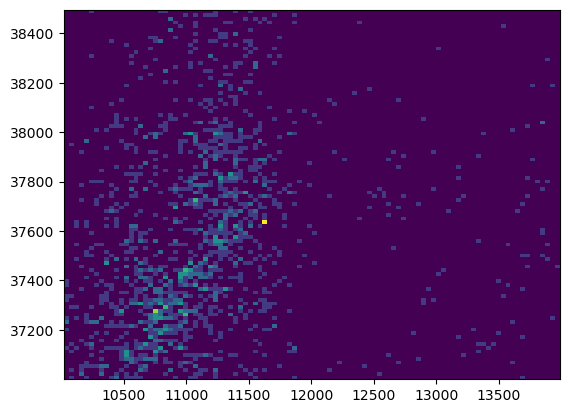

In [53]:
plt.hist2d(subhalos[arg_in_box,0],subhalos[arg_in_box,1], bins=100);

In [13]:
subhalos['SubhaloPos']

array([[  849.09143 , 26326.996   , 18306.934   ],
       [  106.473335, 24633.322   , 16900.553   ],
       [  853.11237 , 26725.748   , 17510.68    ],
       ...,
       [70013.06    , 20824.584   , 70093.69    ],
       [71621.484   , 23869.992   , 51625.562   ],
       [71024.98    , 23053.      , 52052.715   ]], dtype=float32)

In [242]:
ID_most_stars = sorted_unique[np.where(sorted_unique < MPB_count)][:20]

/tmp/ipykernel_6209/3034840276.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab20 = plt.cm.get_cmap('tab20', 20).colors
/tmp/ipykernel_6209/3034840276.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_use,Y_use, s=0.5, alpha=0.3, c=tab20[index])


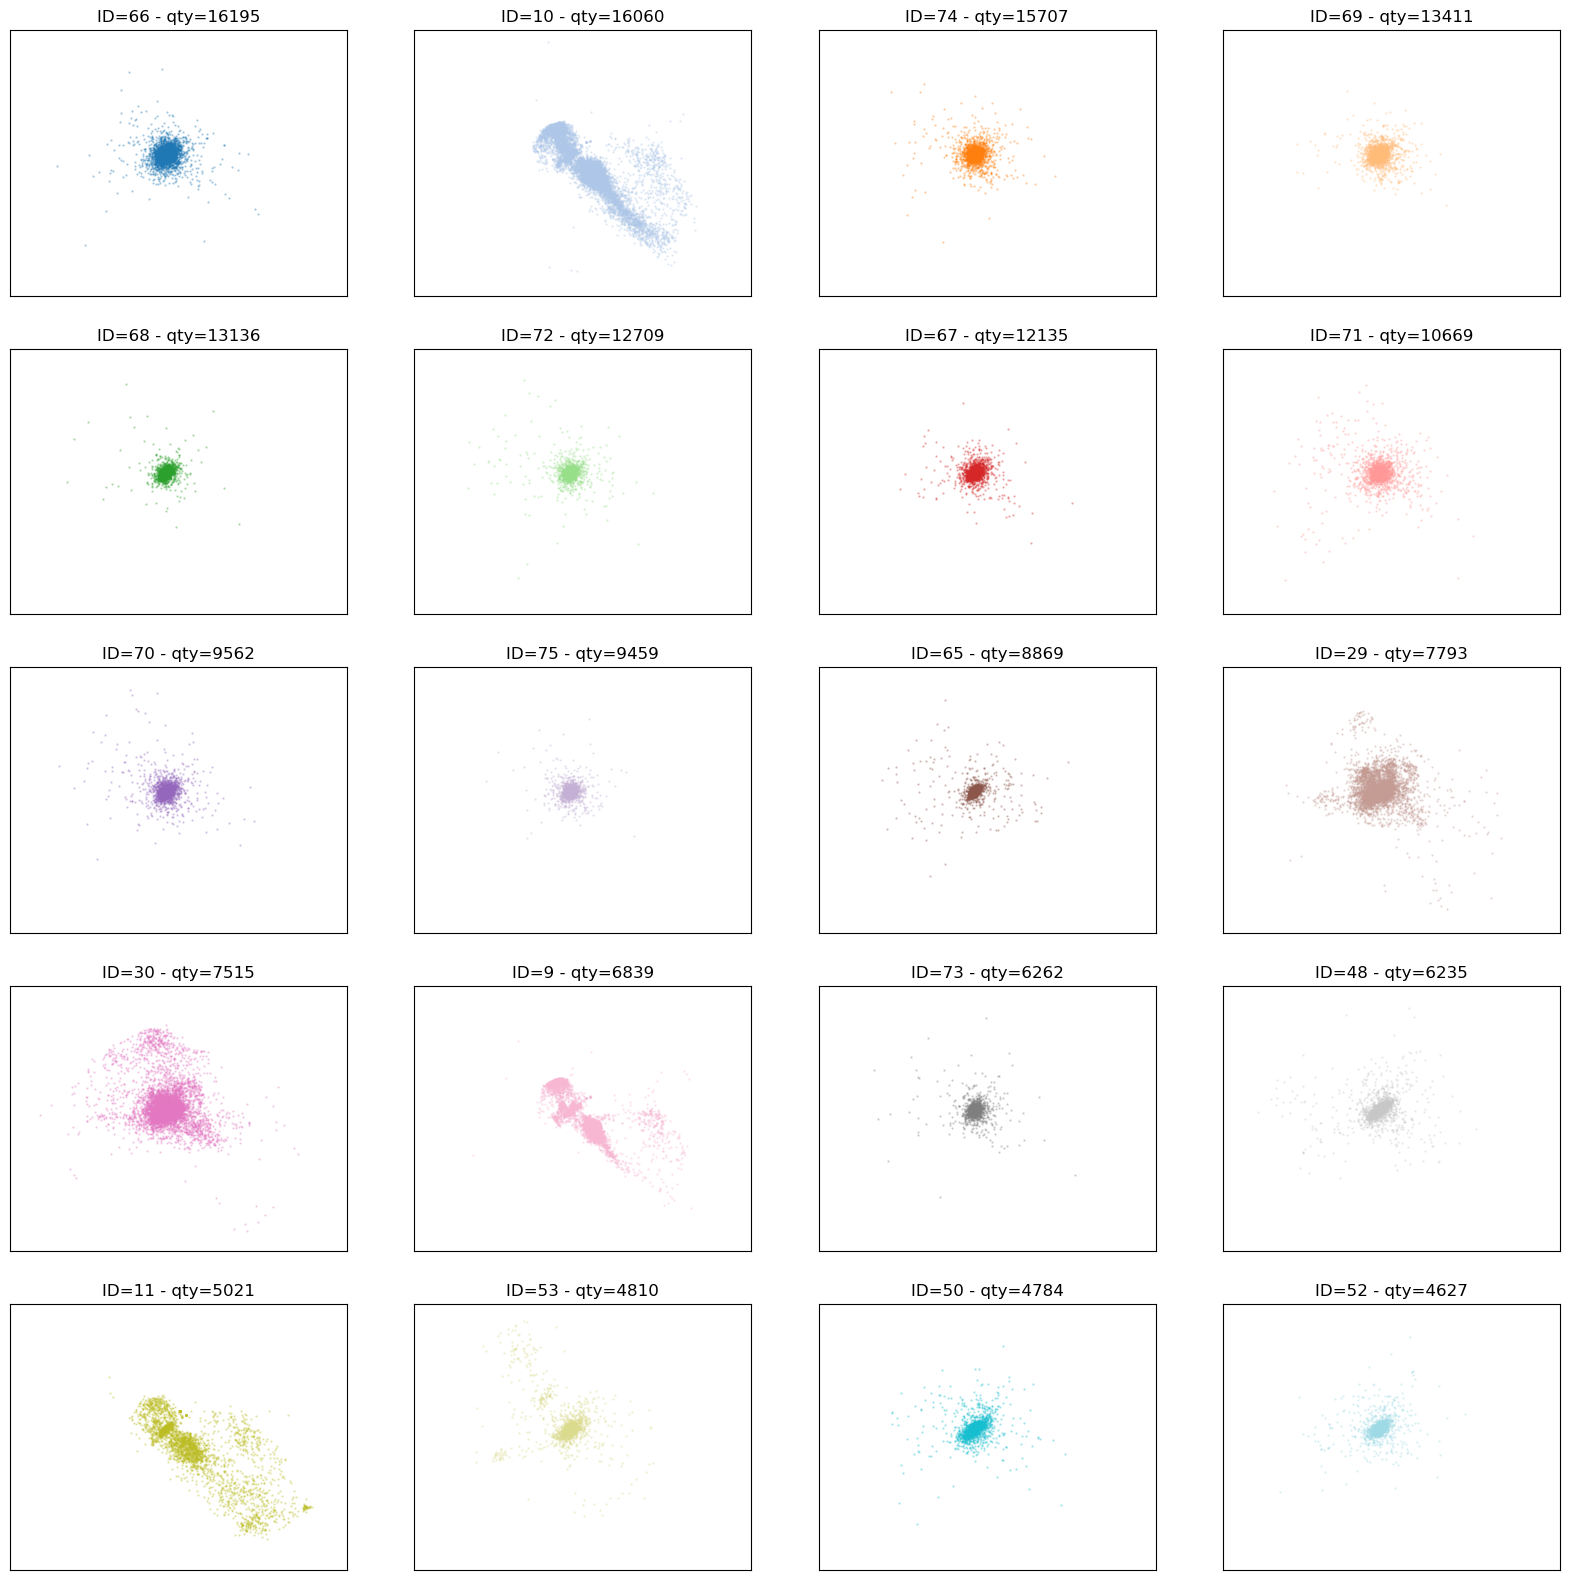

In [249]:
# arg_top20_subhalo_most_stars = np.argsort(qty_stars_in_mask)[-20:][::-1]
# tree_IDs_subhalo_most_stars = np.array(mask_tree_ID)[arg_top20_subhalo_most_stars]

subhalo_mass = tree['Mass']
snap = tree['SnapNum']

X = stars['Coordinates'][:,0]
Y = stars['Coordinates'][:,1]

tab20 = plt.cm.get_cmap('tab20', 20).colors
plt.figure(figsize=(20,20))
for index, i in enumerate(ID_most_stars):
    plt.subplot(5,4,index+1)
    arg_use = np.where(progenitorID == i)
    X_use = X[arg_use]
    Y_use = Y[arg_use]
    plt.scatter(X_use,Y_use, s=0.5, alpha=0.3, c=tab20[index])
    # plt.hist2d(X_use,Y_use, bins=100, norm=SymLogNorm(1))
    plt.title(f'ID={i} - qty={count[sorted_count[index]]}')
    # plt.title(f'ID={i} - qty={ID_most_stars[index]} - M={subhalo_mass[i]:.2f}')# - s={snap[i]:.2f}')
    plt.xlim([10300,11300])
    plt.ylim([36900,37600])
    plt.xticks([])
    plt.yticks([])
# plt.legend(loc='best')

In [ ]:
progenitorID = np.zeros(stars['count'], dtype=int) - 1

# Iterate on the snapshots
for s in tqdm(numsnap, leave=True):

    # Iterate on the subhalos in that snapshot ONLY
    idx_subhalos  = np.where(subhalo_snap == s)[0]
    keep_subhalos = subhalo_ID[idx_subhalos]

    for index, i in enumerate(keep_subhalos):

        # Load ID of stars in the subhalo
        subhalos_starsID = il.snapshot.loadSubhalo(basePath, s, i, 'stars', fields=['ParticleIDs'])

        not_already_IDed = np.where(progenitorID == -1)[0]
        stars_in = np.isin(starsID[not_already_IDed], subhalos_starsID)

        indices = not_already_IDed[stars_in]
        progenitorID[indices] = tree['SubhaloID'][idx_subhalos][index] - ID_init


In [ ]:
# np.savetxt(f'progenitorID_subhalo{halo_ID}.txt', progenitorID, fmt='%d')

In [101]:
a = np.loadtxt(f'progenitorID_subhalo{halo_ID}.txt')#, progenitorID, fmt='%d')

In [102]:
a

array([ 63990.,  31846.,  24617., ..., 284528., 271884., 261522.])